In [1]:
import pandas as pd
import circlify
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

# 設定字體
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(font=['Taipei Sans TC Beta'])

##### 行政區商圈數量

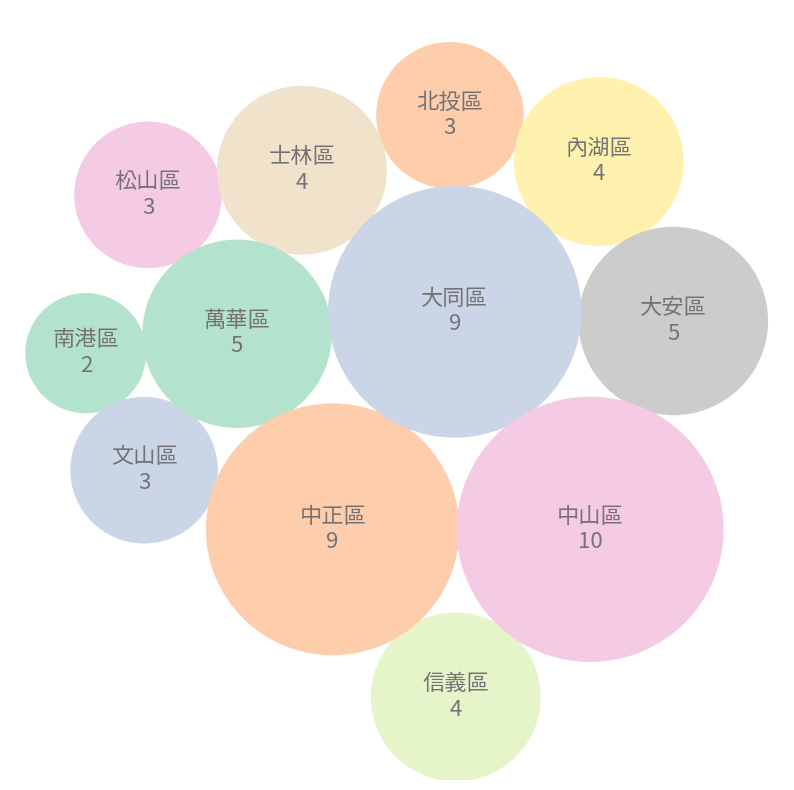

In [8]:
file_path = 'data/北市_商圈綠地.csv'
data = pd.read_csv(file_path)

# Group and count data
grouped_data = data.groupby(['區', 'type']).size().reset_index(name='counts')

# Separate and sort the dataframes for '商圈' and '公園'
business_districts_data = grouped_data[grouped_data['type'] == '商圈'].sort_values(by='counts', ascending=True)

business_values = business_districts_data['counts'].tolist()
business_labels = business_districts_data['區'].tolist()
business_circles = circlify.circlify(business_values, show_enclosure=False)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in business_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(business_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(business_circles, business_labels, colors, business_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()





##### 行政區公園綠地數量

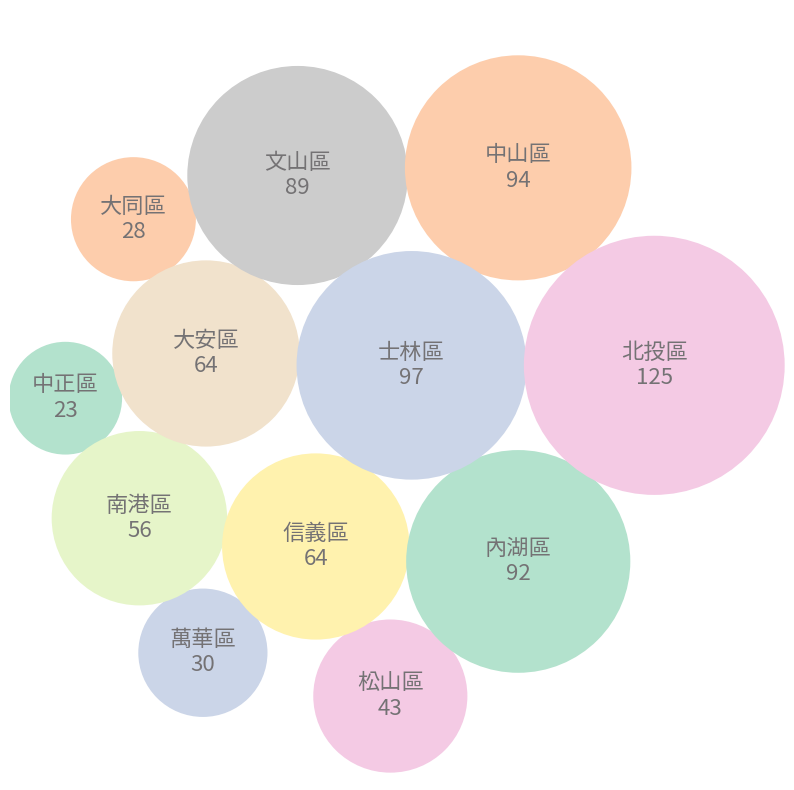

In [7]:
# Separate and sort the dataframes for '商圈' and '公園'
park_data = grouped_data[grouped_data['type'] == '公園'].sort_values(by='counts', ascending=True)

park_values = park_data['counts'].tolist()
park_labels = park_data['區'].tolist()

park_circles = circlify.circlify(park_values, show_enclosure=False)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in park_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(park_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(park_circles, park_labels, colors, park_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()

##### 行政區綜合居住環境

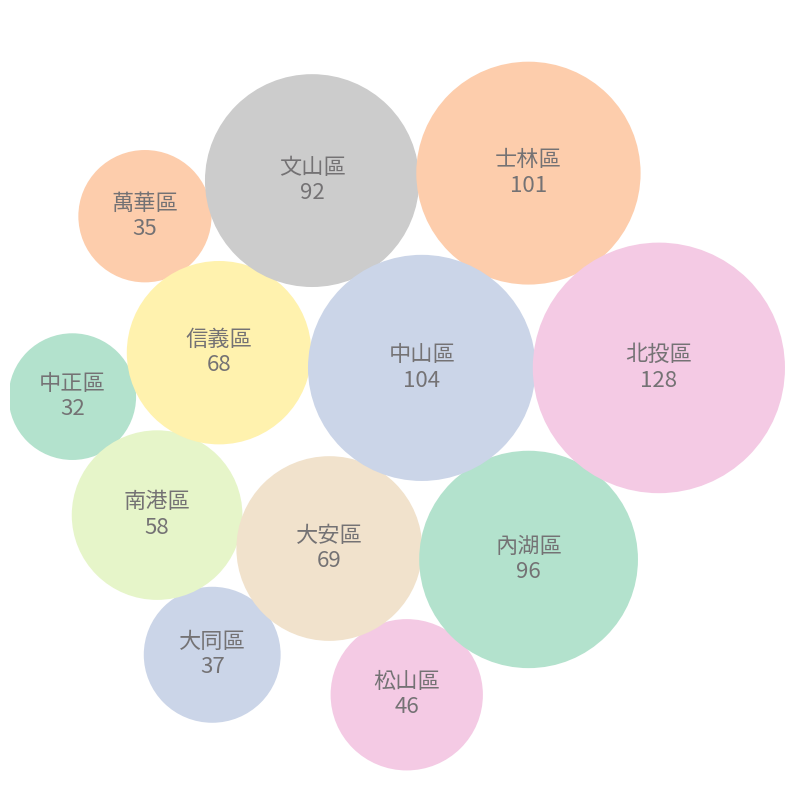

In [6]:
grouped_data = data.groupby(['區', 'type']).size().reset_index(name='counts')
summed_data = grouped_data.groupby('區')['counts'].sum().reset_index()

sorted_summed_data = summed_data.sort_values(by='counts', ascending=True)
summed_values = sorted_summed_data['counts'].tolist()
summed_labels = sorted_summed_data['區'].tolist()

summed_circles = circlify.circlify(summed_values, show_enclosure=False)


fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in summed_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(summed_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(summed_circles, summed_labels, colors, summed_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()
